In [2]:
import  pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('spotify_cleaned_data.csv')

In [10]:
df.head()

,Unnamed: 0,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Total_counts,Total_reach,Total_streams,Total_likes,Total_Views
0,0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1.0,725.4,3.904709e+08,30716.0,196631588.0,...,18004655.0,22931.0,4818457.0,2669262.0,0,2700154.0,3.648273e+08,413294048.0,6.532790e+08,5.416557e+09
1,1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2.0,545.9,3.237039e+08,28113.0,174597137.0,...,7780028.0,28444.0,6623075.0,1118279.0,1,1146570.0,3.413999e+08,338106987.0,3.871029e+07,3.246861e+08
2,2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3.0,538.4,6.013093e+08,54331.0,211607669.0,...,5022621.0,5639.0,7208651.0,5285340.0,0,5339979.0,6.217145e+08,613540555.0,2.773830e+08,3.491720e+09
3,3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4.0,444.9,2.031281e+09,269802.0,136569078.0,...,190260277.0,203384.0,NaN,11822942.0,0,12093218.0,3.512442e+09,NaN,1.089388e+09,1.569983e+10
4,4,Houdini,Houdini,Eminem,2024-05-31,5.0,423.3,1.070349e+08,7223.0,151469874.0,...,4493884.0,7006.0,207179.0,457017.0,1,464427.0,2.818943e+08,111735985.0,NaN,NaN


In [4]:
df.drop(['Unnamed: 0'] , axis=1 , inplace = True)

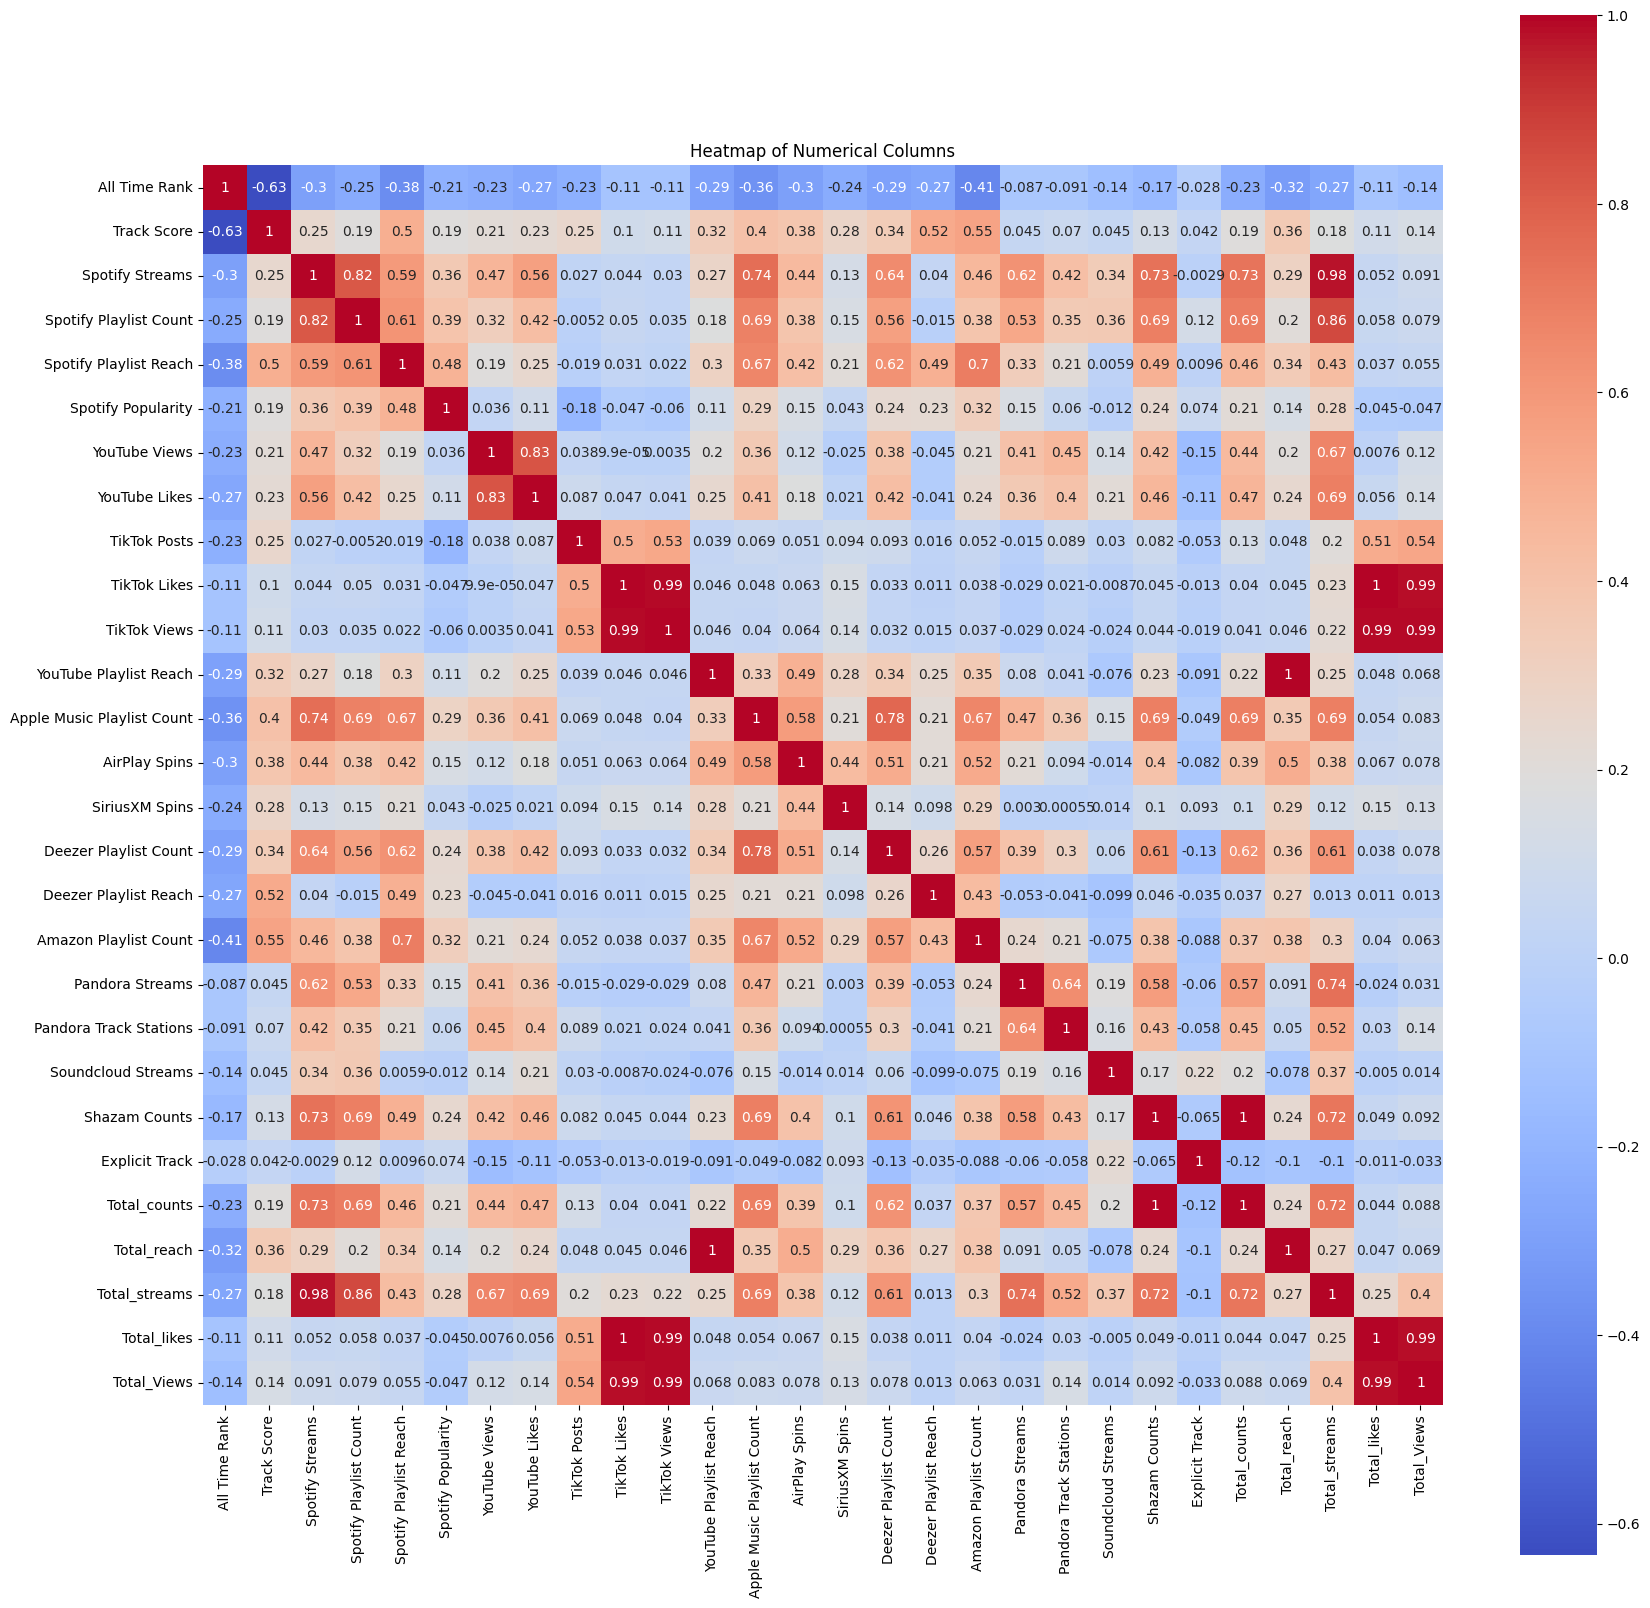

In [13]:
numerical_cols = df.select_dtypes(include=[int, float]).columns

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Numerical Columns')
plt.show()

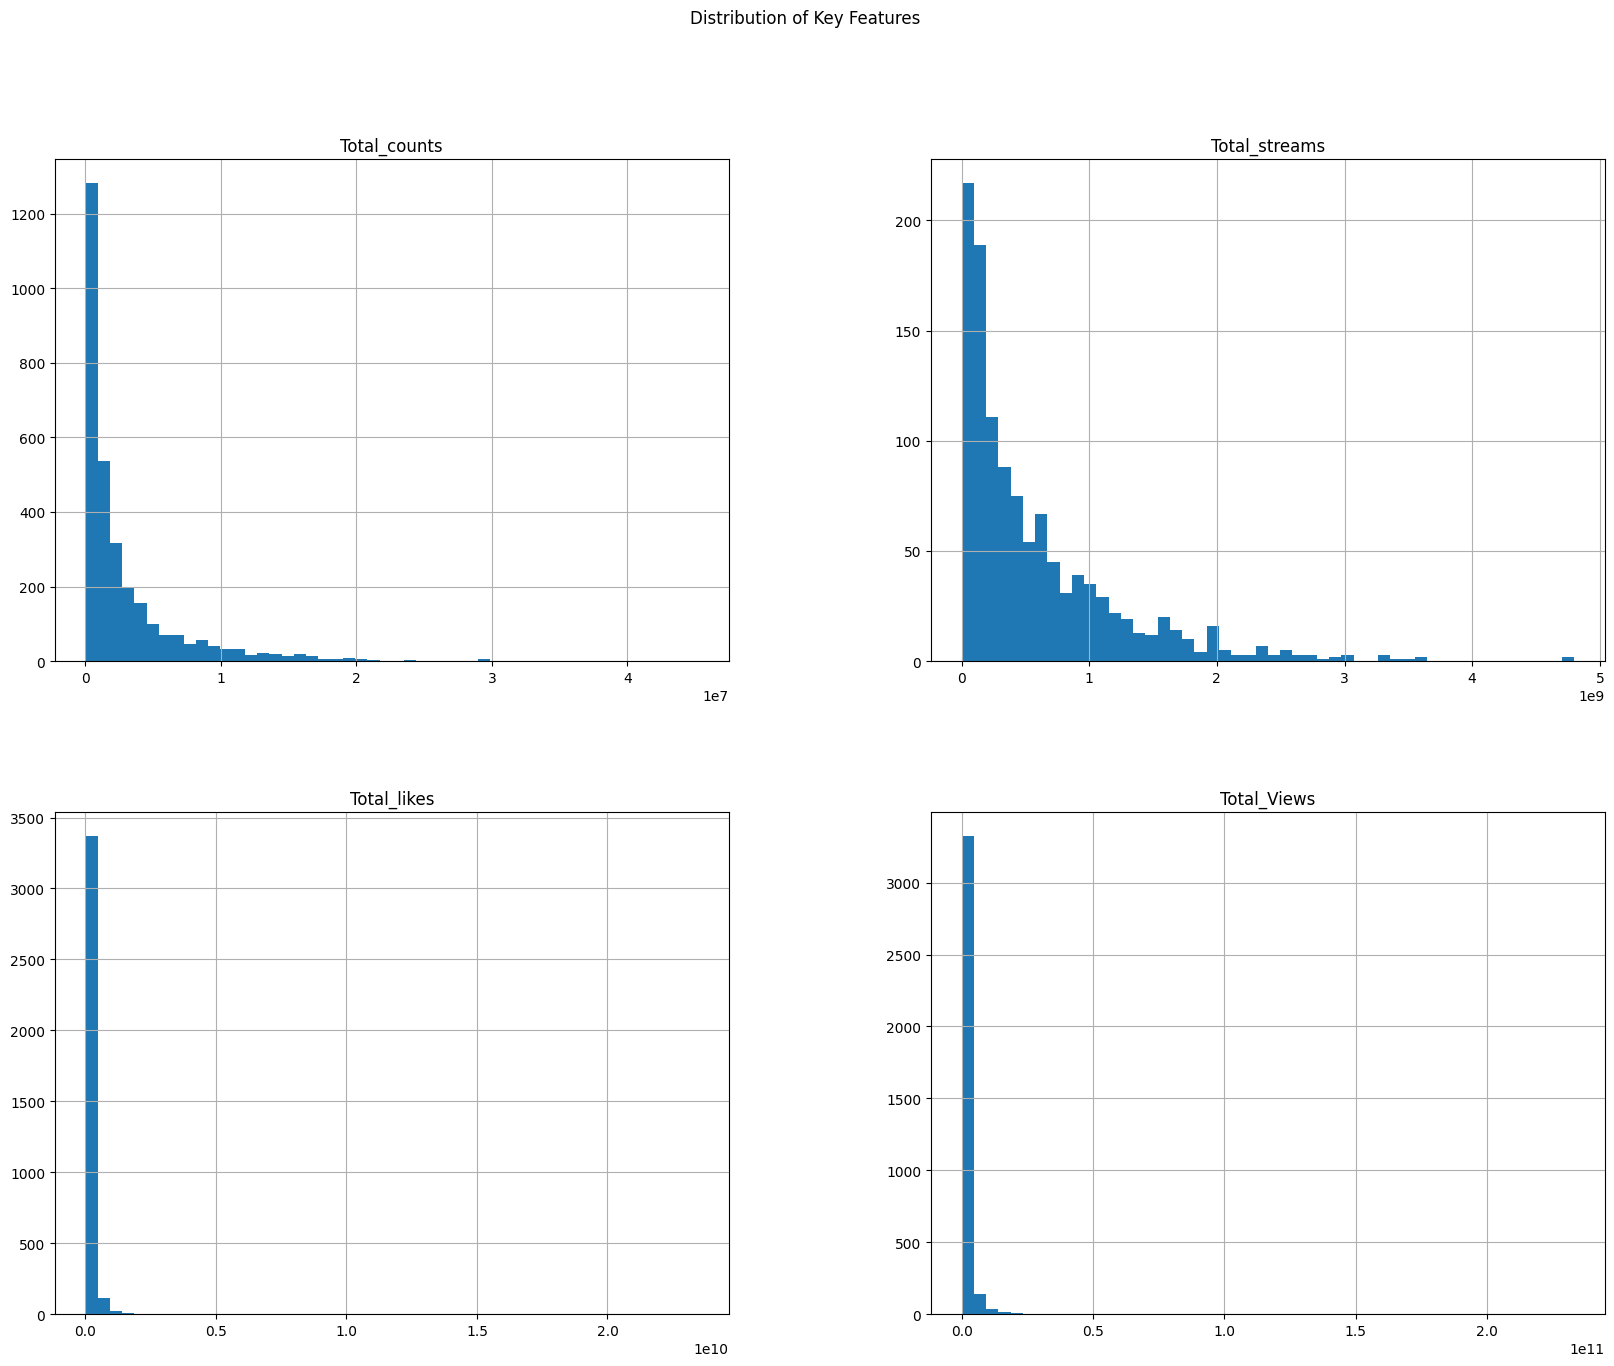

In [15]:
key_features = ["Total_counts", 'Total_streams', 'Total_likes' , "Total_Views"]
df[key_features].hist(bins=50, figsize=(20, 15))
plt.suptitle('Distribution of Key Features')
plt.show()

In [14]:
df['Artist'].value_counts()

Artist
Drake                       63
Taylor Swift                63
Bad Bunny                   60
KAROL G                     32
The Weeknd                  31
                            ..
Carrier                      1
Javed Ali                    1
The King Khan & BBQ Show     1
Marca MP                     1
BUSHIDO ZHO                  1
Name: count, Length: 1999, dtype: int64

In [16]:
def top_10_artists(df):
   
    required_columns = ['Artist', 'Spotify Streams', 'YouTube Views', 'TikTok Views', 'Soundcloud Streams', 'Pandora Streams']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
    
   
    df_filled = df.fillna({col: 0 for col in required_columns[1:]})
    
    
    df_filled['Total Streams'] = df_filled[['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Soundcloud Streams', 'Pandora Streams']].sum(axis=1)
    
   
    artist_streams = df_filled.groupby('Artist')['Total Streams'].sum().reset_index()
    
    
    top_10 = artist_streams.sort_values(by='Total Streams', ascending=False).head(10)
    
    return top_10



In [17]:
top_10_artists_df = top_10_artists(df)
print(top_10_artists_df)

                        Artist  Total Streams
963              Kevin MacLeod   2.332552e+11
1713  The King Khan & BBQ Show   2.148680e+11
183                  Bad Bunny   1.106499e+11
1690              Taylor Swift   8.950993e+10
545                 Ed Sheeran   7.648841e+10
517                      Drake   7.642023e+10
506                   Doja Cat   7.624961e+10
1728                The Weeknd   7.512028e+10
988                     Kreepa   6.114721e+10
129              Ariana Grande   5.730512e+10


In [19]:
def plot_top_10_artists(top_10_artists_df):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Total Streams', y='Artist', data=top_10_artists_df, palette='viridis')
    plt.title('Top 10 Artists by Total Streams')
    plt.xlabel('Total Streams')
    plt.ylabel('Artist')
    plt.show()

C:\Users\jaink\AppData\Local\Temp\ipykernel_5260\197684368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Streams', y='Artist', data=top_10_artists_df, palette='viridis')


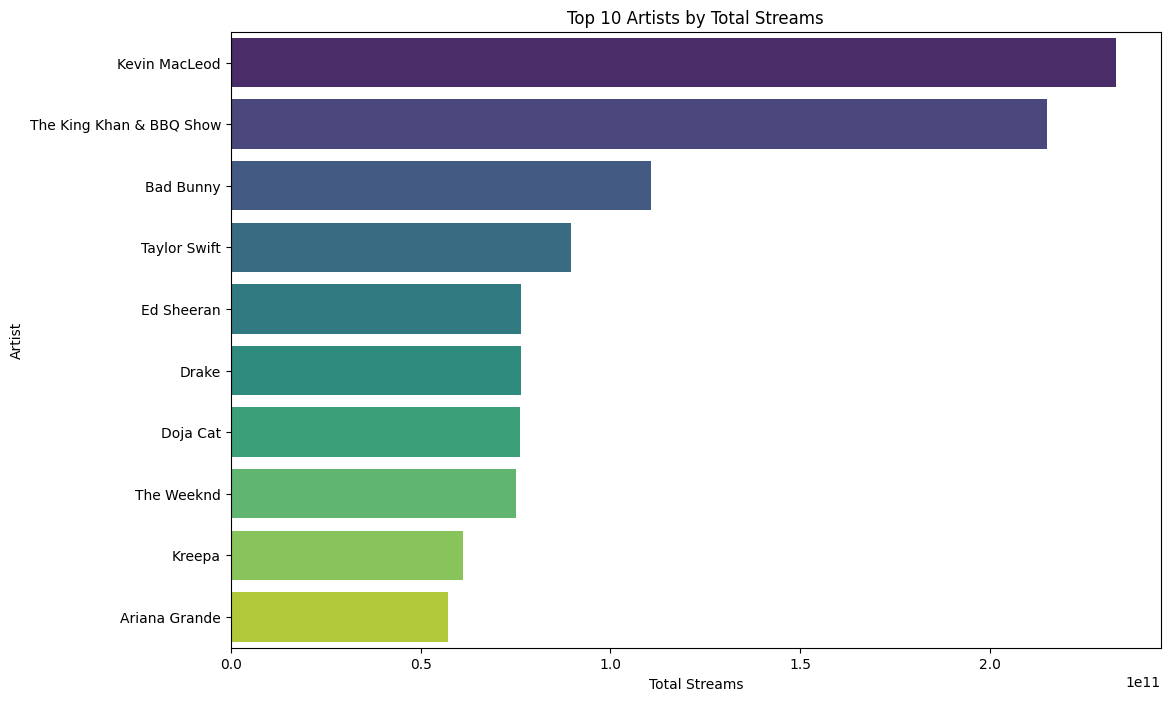

In [20]:
plot_top_10_artists(top_10_artists_df)

In [21]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'All Time Rank',
       'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
       'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track', 'Total_counts',
       'Total_reach', 'Total_streams', 'Total_likes', 'Total_Views'],
      dtype='object')

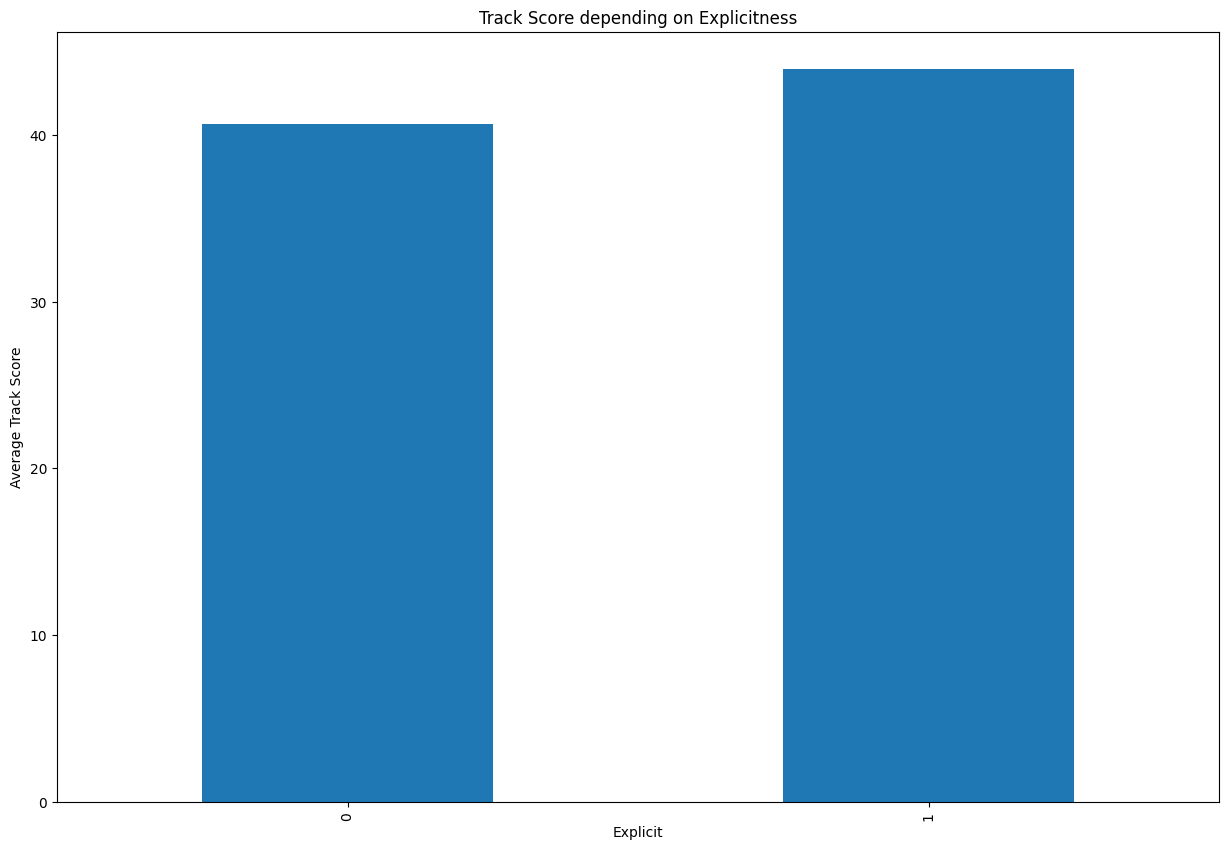

In [31]:
explicit_track_scores = df.groupby('Explicit Track')['Track Score'].mean()

plt.figure(figsize=(15, 10))
explicit_track_scores.plot(kind='bar')
plt.title('Track Score depending on Explicitness')
plt.xlabel('Explicit')
plt.ylabel('Average Track Score')
plt.show()

songs which are having explicit content have more track score

C:\Users\jaink\AppData\Local\Temp\ipykernel_5260\1708169577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_artists_df['Year'] = pd.to_datetime(top_artists_df['Release Date']).dt.year


<Figure size 1400x800 with 0 Axes>

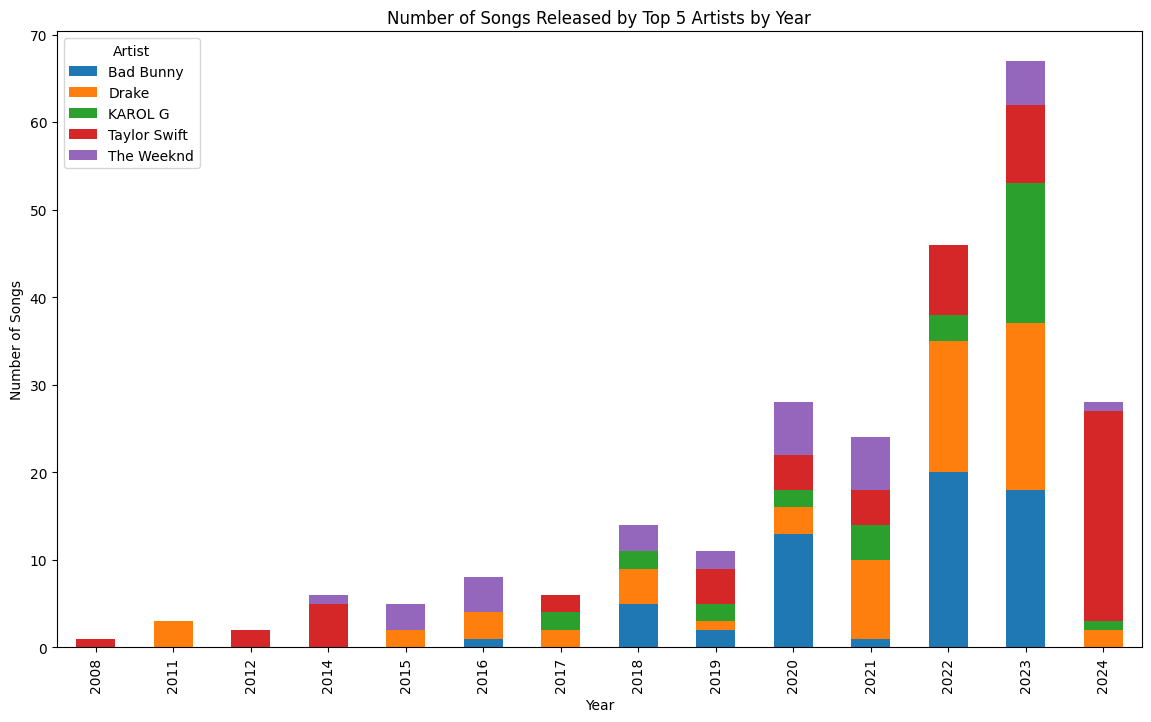

In [32]:


top_artists = df['Artist'].value_counts().head(5).index

top_artists_df = df[df['Artist'].isin(top_artists)]

top_artists_df['Year'] = pd.to_datetime(top_artists_df['Release Date']).dt.year

grouped_df = top_artists_df.groupby(['Artist', 'Year']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
grouped_df.T.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Number of Songs Released by Top 5 Artists by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Artist')
plt.show()


Clearly visible that Taylor has increased her no of songs every year

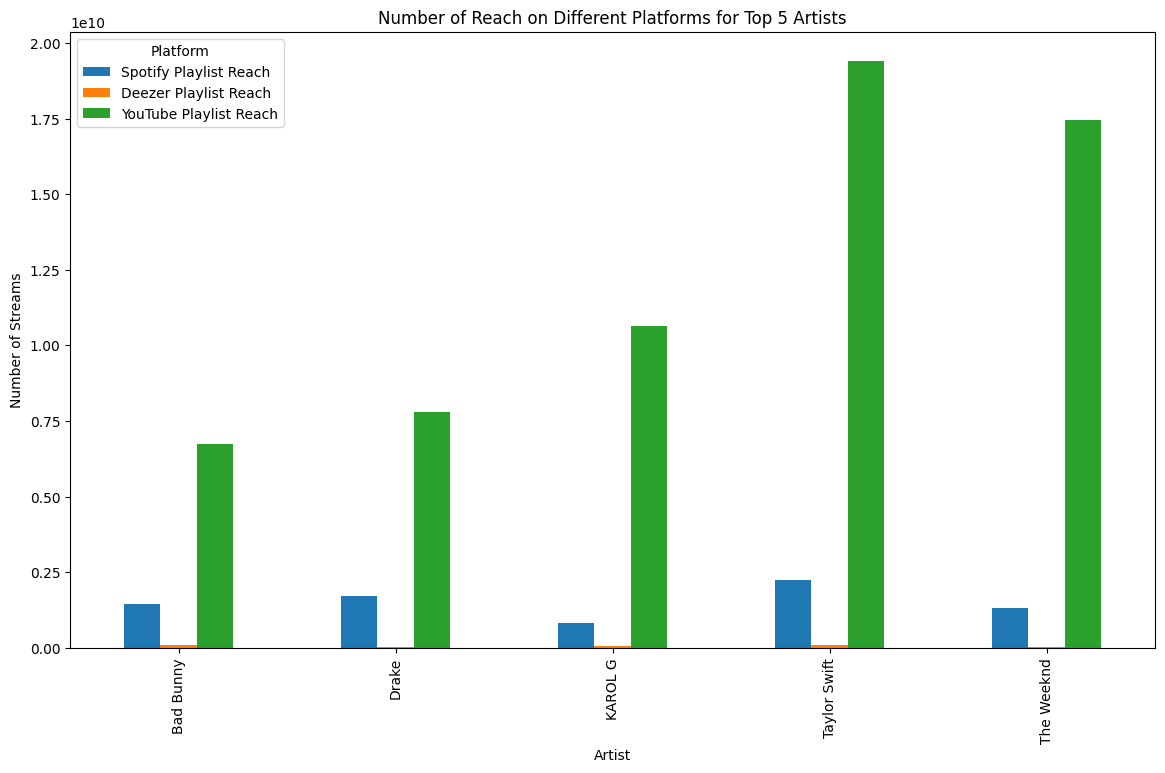

In [33]:
platform_columns = ['Spotify Playlist Reach', 'Deezer Playlist Reach', 'YouTube Playlist Reach' ]

grouped_df = top_artists_df.groupby('Artist')[platform_columns].sum()

grouped_df.plot(kind='bar', figsize=(14, 8))
plt.title('Number of Reach on Different Platforms for Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Streams')
plt.legend(title='Platform')
plt.show()

Clearly youtube is promoting top artists as compared to spotify 

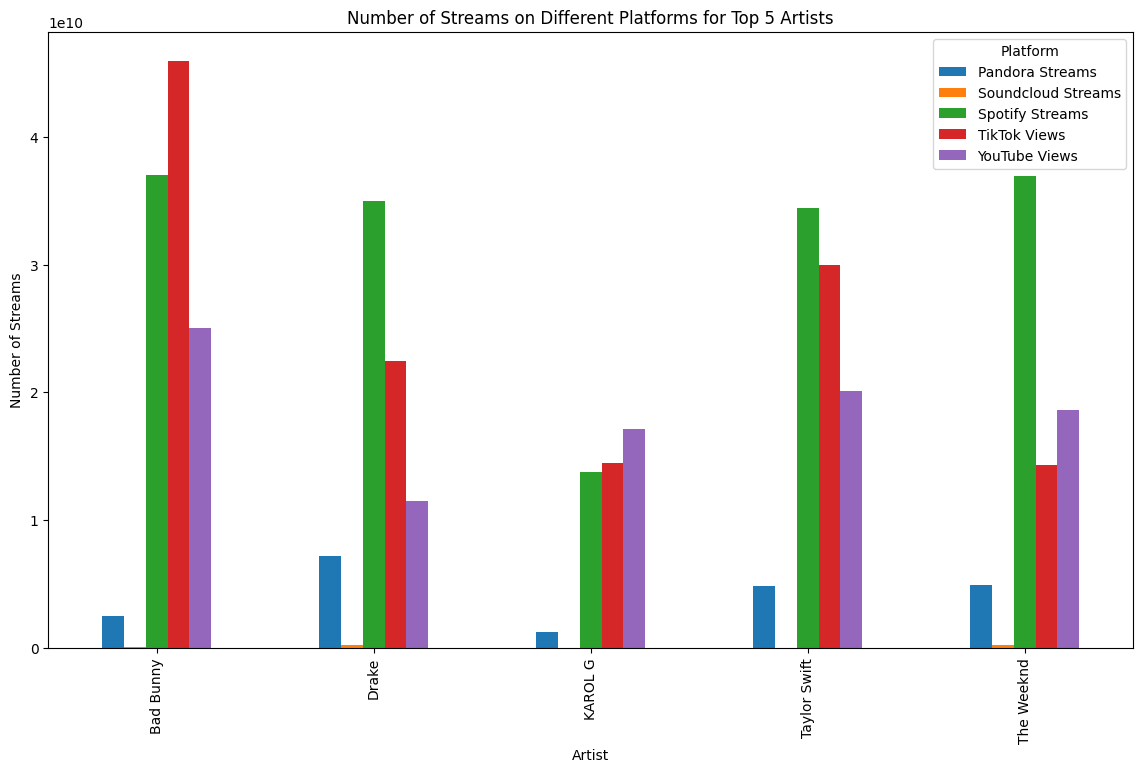

In [34]:
platform_columns = ['Pandora Streams', 'Soundcloud Streams', 'Spotify Streams' , 'TikTok Views', 'YouTube Views']

grouped_df = top_artists_df.groupby('Artist')[platform_columns].sum()

grouped_df.plot(kind='bar', figsize=(14, 8))
plt.title('Number of Streams on Different Platforms for Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Streams')
plt.legend(title='Platform')
plt.show()

Bad bunny has more views  in tiktok

Drake spotify

karol g have mixed audience in every  platform

taylor spotify

the weekend spotify

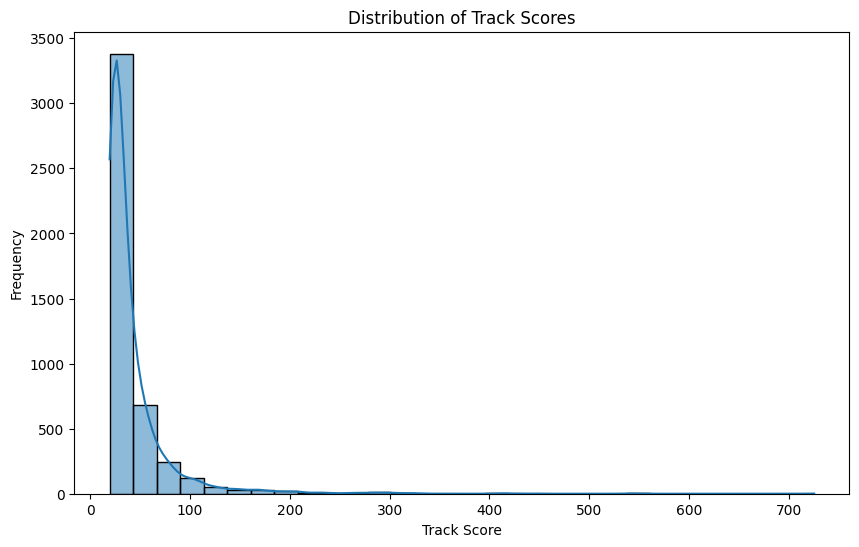

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Track Score'], kde=True, bins=30)
plt.title('Distribution of Track Scores')
plt.xlabel('Track Score')
plt.ylabel('Frequency')
plt.show()


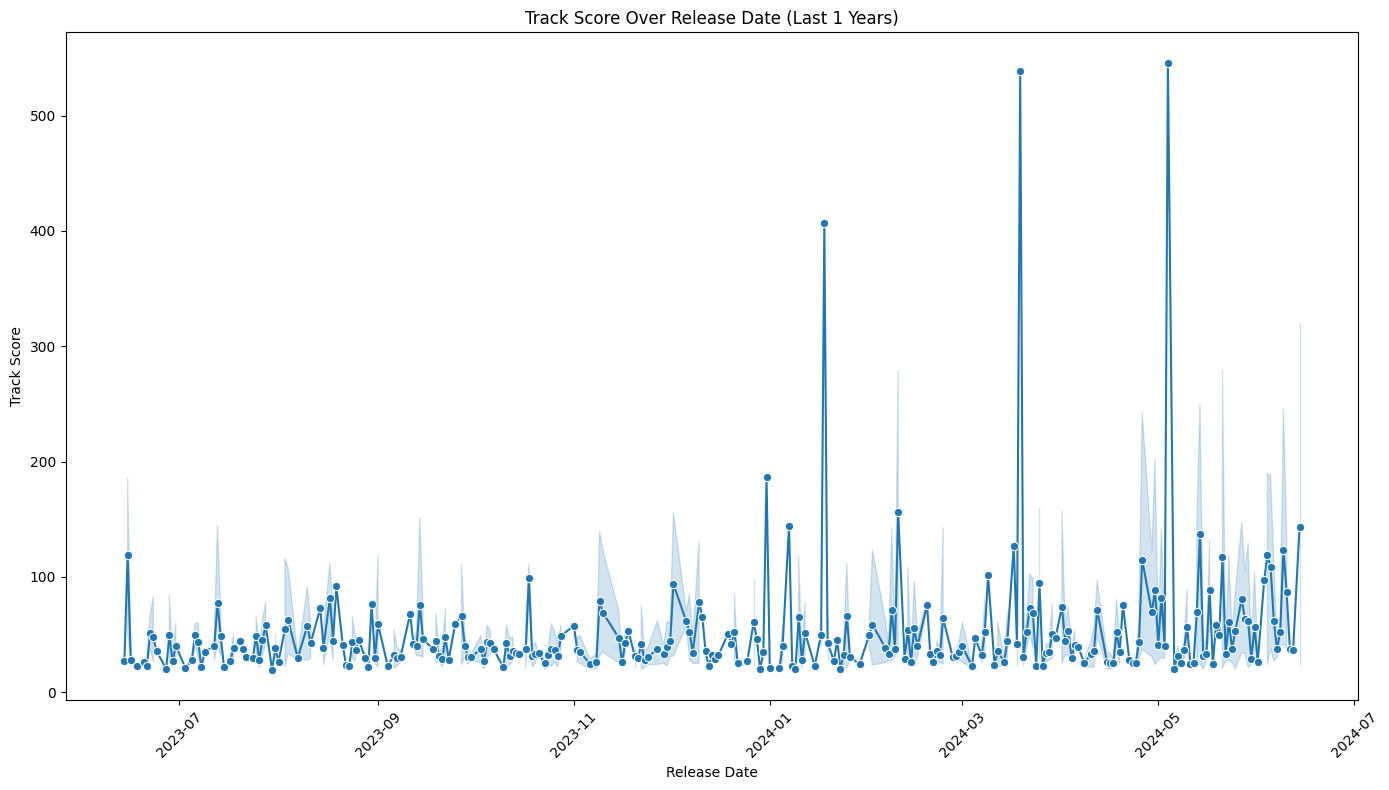

In [12]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

end_date = df['Release Date'].max()
start_date = end_date - pd.DateOffset(years=1)

df_last_1_years = df[(df['Release Date'] >= start_date) & (df['Release Date'] <= end_date)]

df_last_1_years_sorted = df_last_1_years.sort_values(by='Release Date')

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='Release Date', y='Track Score', data=df_last_1_years_sorted, marker='o')
plt.title('Track Score Over Release Date (Last 1 Years)')
plt.xlabel('Release Date')
plt.ylabel('Track Score')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

C:\Users\jaink\AppData\Local\Temp\ipykernel_11500\3996689227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_albums.values, y=top_albums.index, palette='magma')


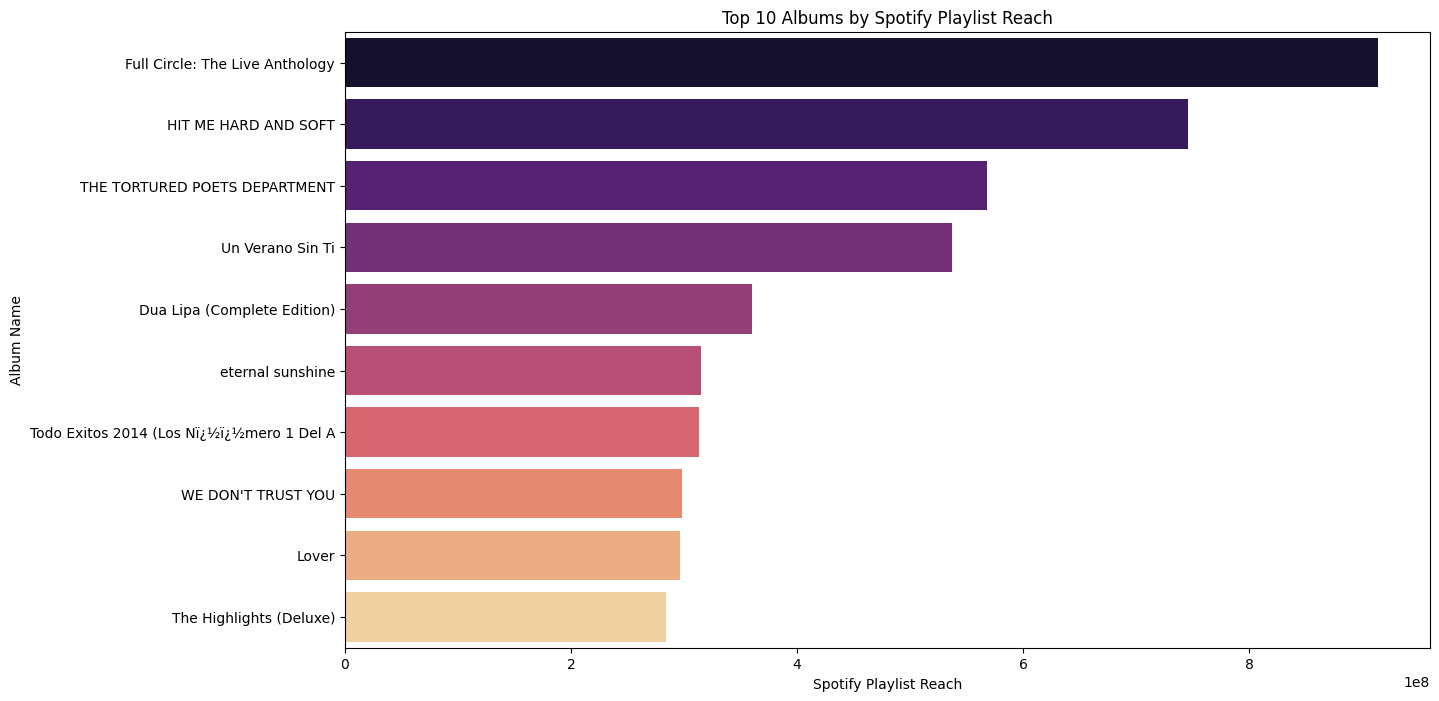

In [5]:
plt.figure(figsize=(14, 8))
top_albums = df.groupby('Album Name')['Spotify Playlist Reach'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_albums.values, y=top_albums.index, palette='magma')
plt.title('Top 10 Albums by Spotify Playlist Reach')
plt.xlabel('Spotify Playlist Reach')
plt.ylabel('Album Name')
plt.show()


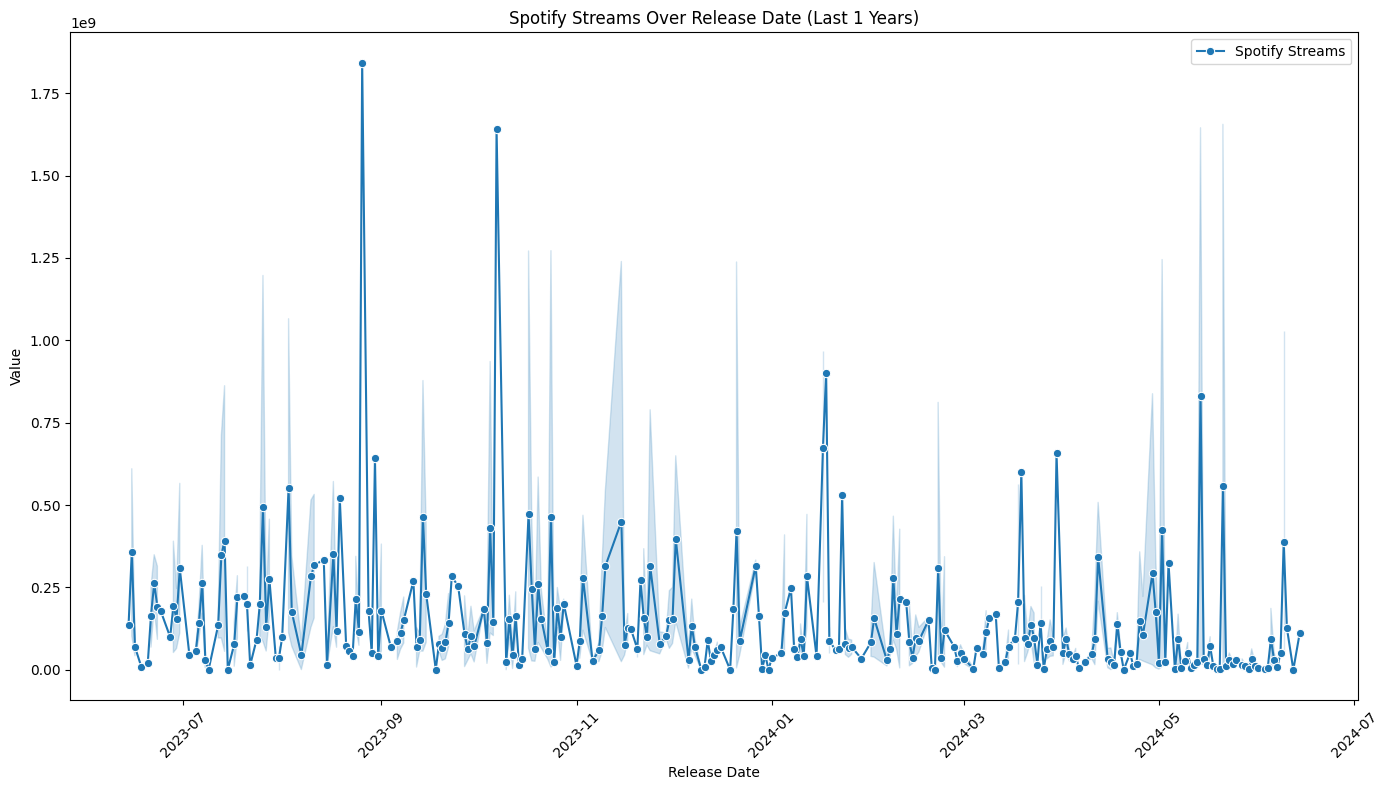

In [15]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Release Date', y='Spotify Streams', data=df_last_1_years_sorted, label='Spotify Streams', marker='o')
plt.title('Spotify Streams Over Release Date (Last 1 Years)')
plt.xlabel('Release Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\jaink\AppData\Local\Temp\ipykernel_11500\1729733635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_track_score_by_artist.values, y=average_track_score_by_artist.index, palette='viridis')


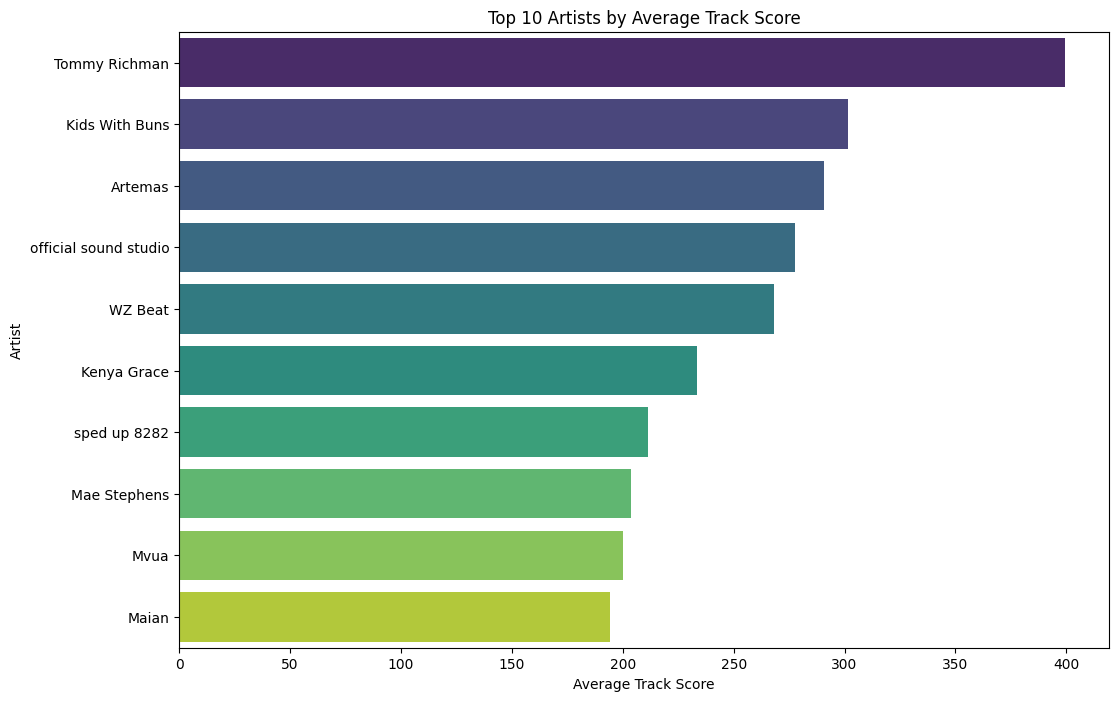

In [16]:
average_track_score_by_artist = df.groupby('Artist')['Track Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_track_score_by_artist.values, y=average_track_score_by_artist.index, palette='viridis')
plt.title('Top 10 Artists by Average Track Score')
plt.xlabel('Average Track Score')
plt.ylabel('Artist')
plt.show()


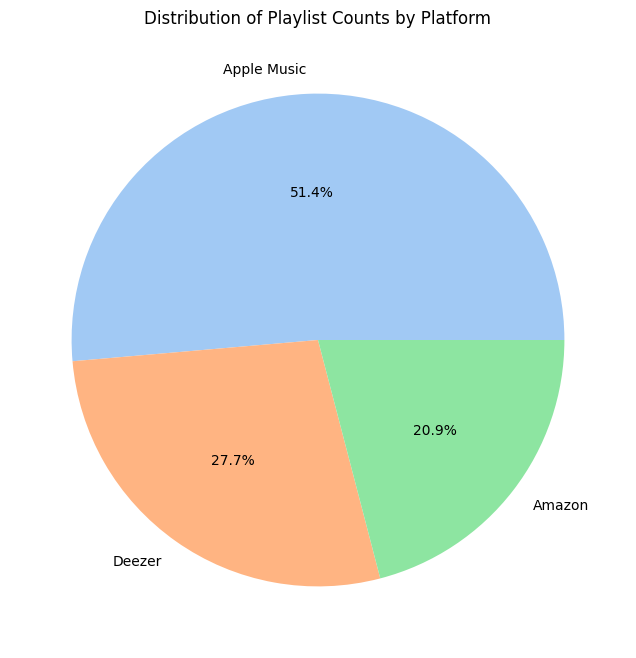

In [18]:
playlist_counts = {
    'Apple Music': df['Apple Music Playlist Count'].sum(),
    'Deezer': df['Deezer Playlist Count'].sum(),
    'Amazon': df['Amazon Playlist Count'].sum()
}

plt.figure(figsize=(8, 8))
plt.pie(playlist_counts.values(), labels=playlist_counts.keys(), autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Playlist Counts by Platform')
plt.show()


C:\Users\jaink\AppData\Local\Temp\ipykernel_11500\1413023020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tracks_by_views.values, y=top_tracks_by_views.index, palette='coolwarm')


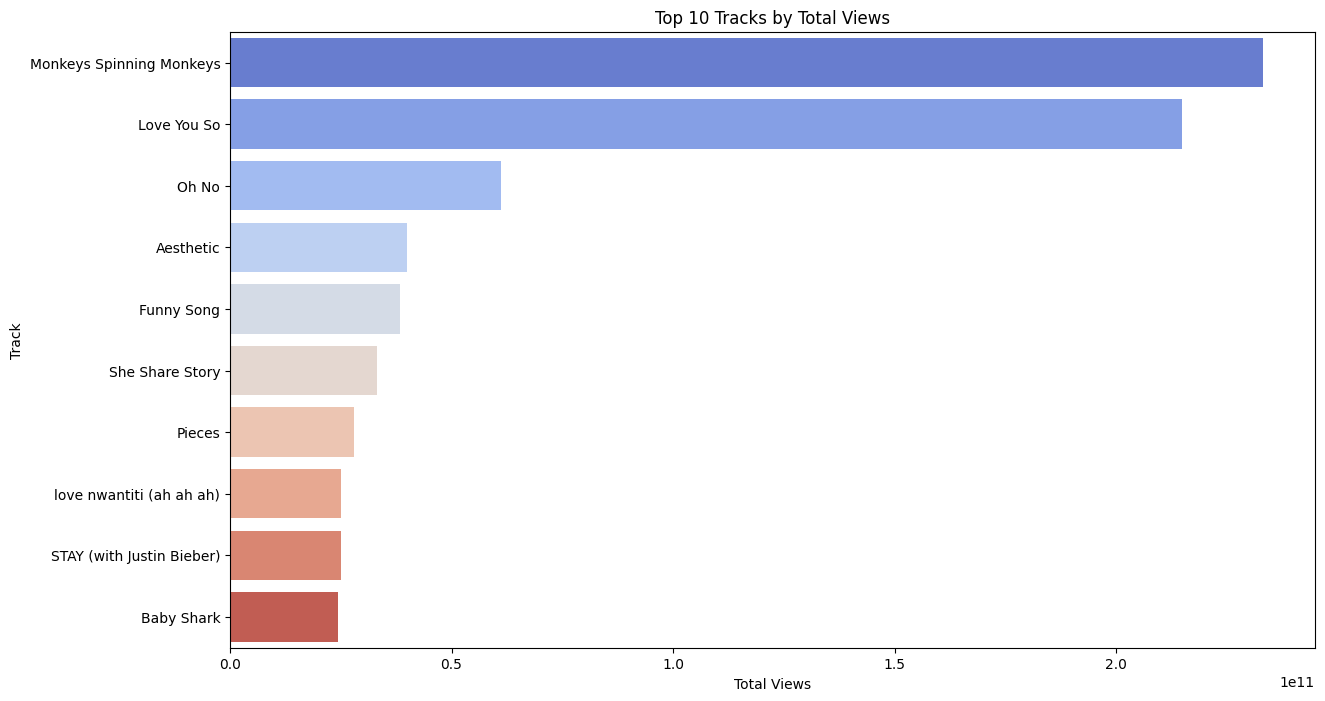

In [21]:
top_tracks_by_views = df.groupby('Track')['Total_Views'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_tracks_by_views.values, y=top_tracks_by_views.index, palette='coolwarm')
plt.title('Top 10 Tracks by Total Views')
plt.xlabel('Total Views')
plt.ylabel('Track')
plt.show()


c:\Users\jaink\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\jaink\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\jaink\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\jaink\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\jaink\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been as

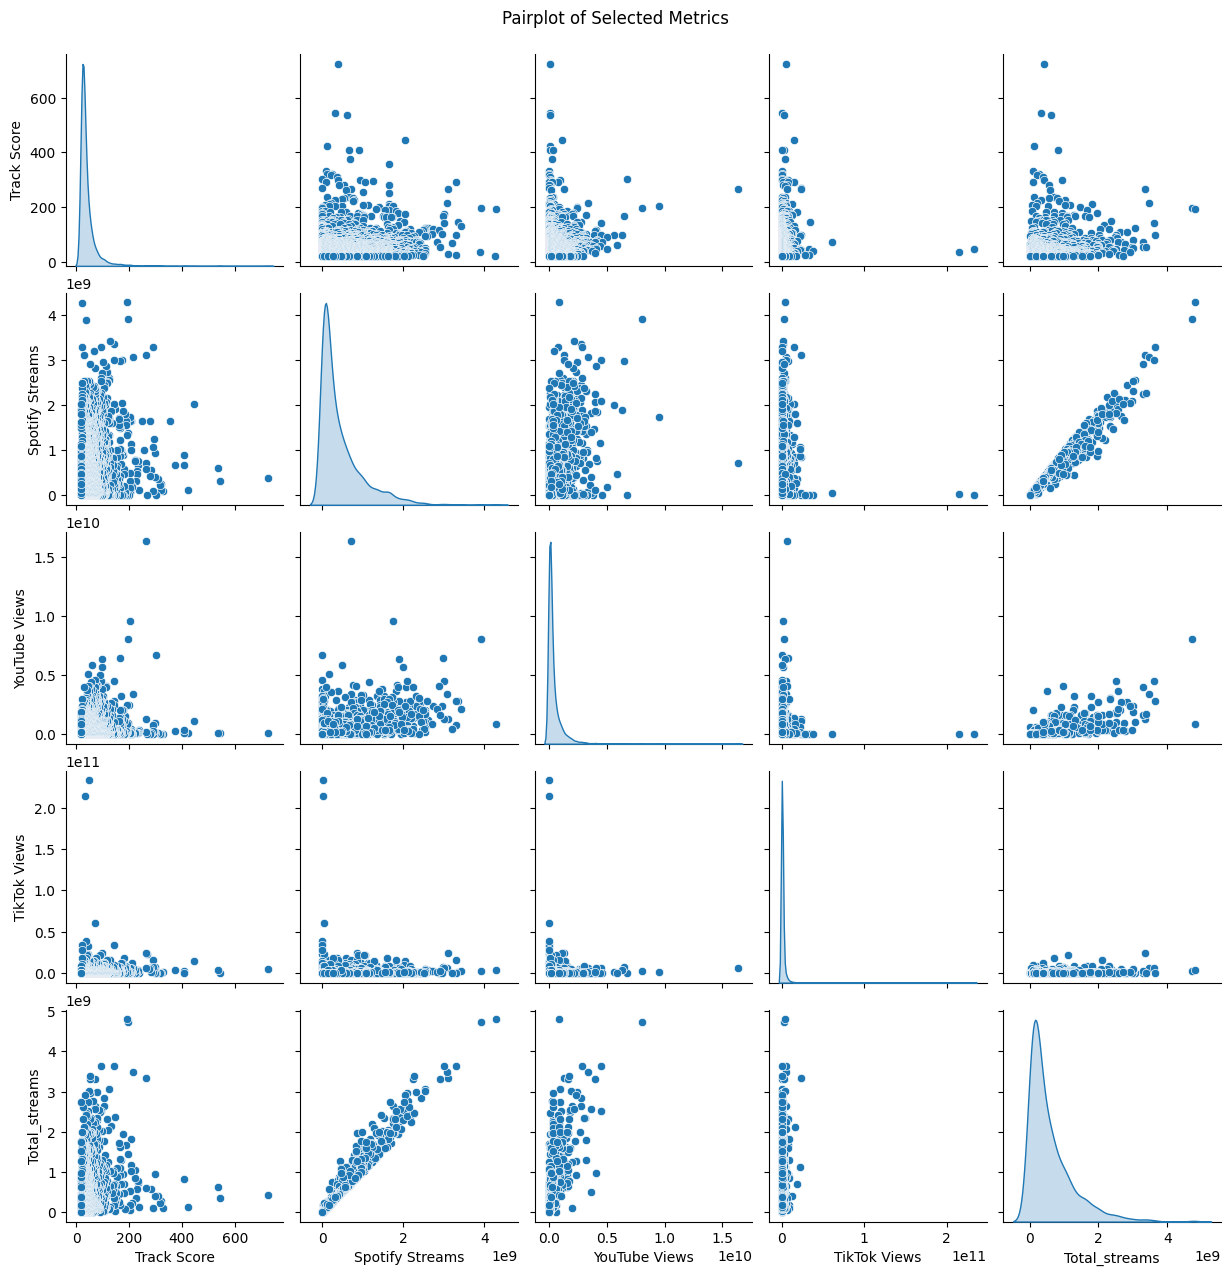

In [22]:
selected_columns = ['Track Score', 'Spotify Streams', 'YouTube Views', 'TikTok Views', 'Total_streams']
sns.pairplot(df[selected_columns], diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Selected Metrics', y=1.02)
plt.show()


C:\Users\jaink\AppData\Local\Temp\ipykernel_11500\181990818.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='AirPlay Spins', data=df_top_artists, palette='crest')


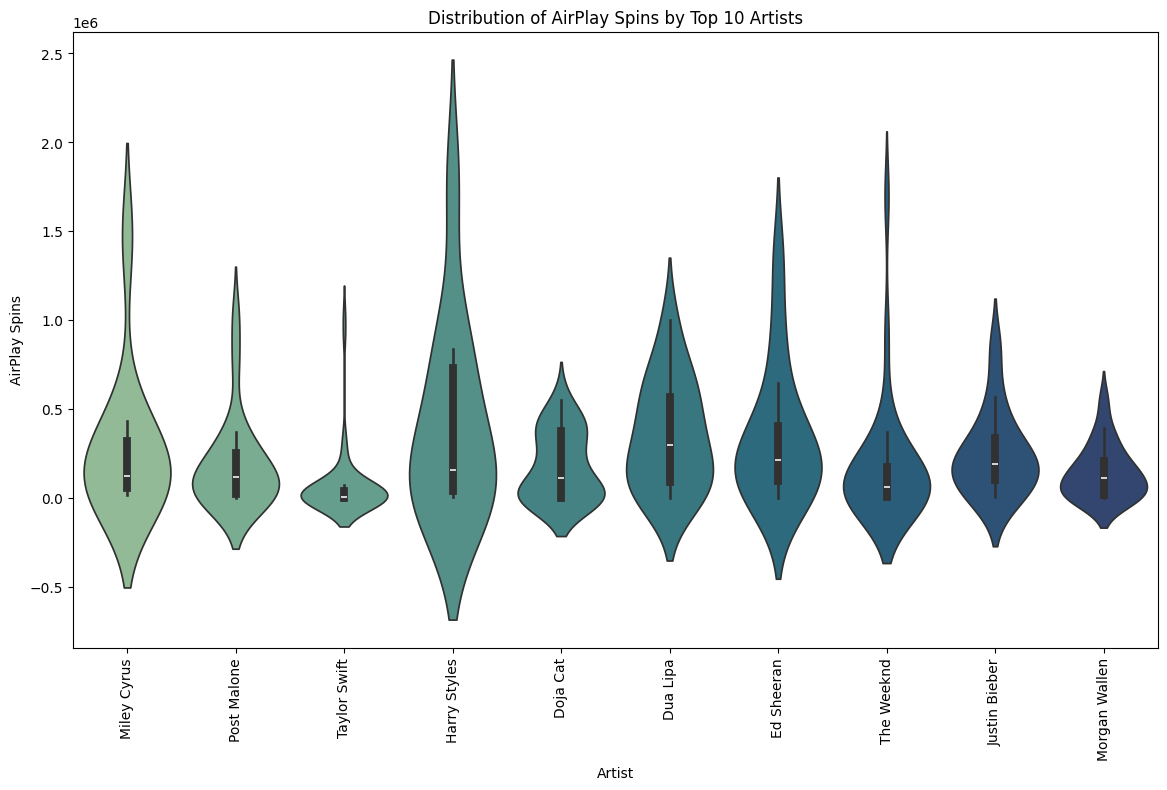

In [26]:

df['AirPlay Spins'] = pd.to_numeric(df['AirPlay Spins'], errors='coerce')

total_airplay_spins_by_artist = df.groupby('Artist')['AirPlay Spins'].sum().sort_values(ascending=False).head(10)

top_artists = total_airplay_spins_by_artist.index

df_top_artists = df[df['Artist'].isin(top_artists)]

plt.figure(figsize=(14, 8))
sns.violinplot(x='Artist', y='AirPlay Spins', data=df_top_artists, palette='crest')
plt.xticks(rotation=90)  
plt.title('Distribution of AirPlay Spins by Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('AirPlay Spins')
plt.show()
